In [62]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

1. Моделировать процесс восстановления (то есть точечный процесс с расстояниями между скачками с указанным распределением) с а) exp(λ) шагами, б) R[0, 1] распределением. Исследовать численно предельное распределение эксцесса и сравнить с распределением шага.

In [63]:
def counter(X,x):
	for i in range(len(X)):
		if X[i]>x:
			return i

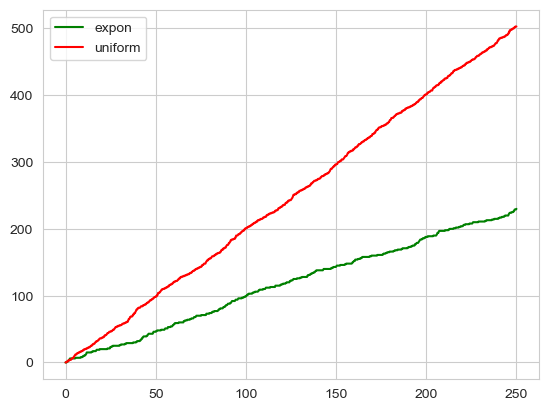

In [77]:
#eta(t)=sup{k: S_k<=t}
n=1000
l=1
X=st.expon.rvs(scale=l,size=n)
Y=np.random.uniform(size=n,low=0,high=1)
for i in range(1,n):
	X[i]+=X[i-1]
	Y[i]+=Y[i-1]
t=np.linspace(0,n/4,1000)
plt.plot(t,[counter(X,i) for i in t],color='green',label='expon')
plt.plot(t,[counter(Y,i) for i in t],color='red',label='uniform')
plt.legend()
None

In [65]:
#эксцесс gamma_t - сколько времени до следующего после t скачка
def gamma(X,t):
	return X[counter(X,t)]-t

In [66]:
def efrone(X,x):
	result=0
	for i in range(len(X)):
		if X[i]<=x:
			result+=1
	return result/len(X)

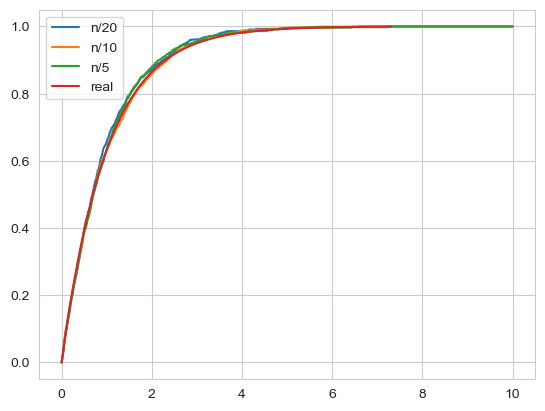

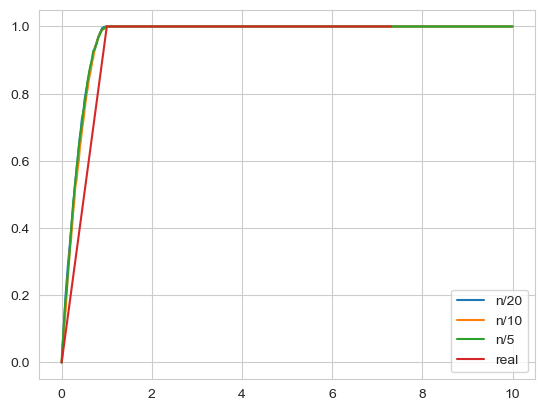

In [67]:
moments=[n/20,n/10,n/5]
gammasamplesx=[np.zeros(1000),np.zeros(1000),np.zeros(1000)]
gammasamplesy=[np.zeros(1000),np.zeros(1000),np.zeros(1000)]
for i in range(3):
	moment=moments[i]
	for j in range(1000):
		X=st.expon.rvs(scale=l,size=n)
		Y=np.random.uniform(size=n,low=0,high=1)
		for k in range(1,n):
			X[k]+=X[k-1]
			Y[k]+=Y[k-1]
		gammasamplesx[i][j]=gamma(X,moment)
		gammasamplesy[i][j]=gamma(Y,moment)
x1=np.linspace(0,10,1000)
plt.plot(x1,[efrone(gammasamplesx[0],i) for i in x1],label='n/20')
plt.plot(x1,[efrone(gammasamplesx[1],i) for i in x1],label='n/10')
plt.plot(x1,[efrone(gammasamplesx[2],i) for i in x1],label='n/5')
x2=np.linspace(0,np.max([np.max(gammasamplesx[0]),np.max(gammasamplesx[1]),np.max(gammasamplesx[2])]),1000)
plt.plot(x2,st.expon.cdf(x2,scale=l),label='real')
plt.legend()
plt.show()
x1=np.linspace(0,10,1000)
plt.plot(x1,[efrone(gammasamplesy[0],i) for i in x1],label='n/20')
plt.plot(x1,[efrone(gammasamplesy[1],i) for i in x1],label='n/10')
plt.plot(x1,[efrone(gammasamplesy[2],i) for i in x1],label='n/5')
x2=np.linspace(0,np.max([np.max(gammasamplesx[0]),np.max(gammasamplesx[1]),np.max(gammasamplesx[2])]),1000)
plt.plot(x2,st.uniform.cdf(x2,loc=0,scale=1),label='real')
plt.legend()

2. Исследовать парадокс времени ожидания: моделировать а) пуассоновский поток с λ = 2 б) процесс с Gamma(2, 1/4) распределением между скачками в) процесс с R[0, 1] распределением между скачками. Рассмотреть среднюю длину промежутка, накрывающего момент 100 и соотнести с математическим ожиданием между промежутками.

In [68]:
a=np.zeros(10000)
b=np.zeros(10000)
c=np.zeros(10000)
for j in range(10000):	
	A=st.expon.rvs(scale=1/2,size=1000)
	B=st.gamma.rvs(a=2,scale=0.25,size=1000)
	C=st.uniform.rvs(loc=0,scale=1,size=1000)
	for i in range(1,1000):
		A[i]+=A[i-1]
		if A[i]>100:
			a[j]=A[i]-A[i-1]
			break
	for i in range(1,1000):
		B[i]+=B[i-1]
		if B[i]>100:
			b[j]=B[i]-B[i-1]
			break
	for i in range(1,1000):
		C[i]+=C[i-1]
		if C[i]>100:
			c[j]=C[i]-C[i-1]
			break
print(str(np.mean(a))+' Ожидалось 0.5')
print(str(np.mean(b))+' Ожидалось 0.5')
print(str(np.mean(c))+' Ожидалось 0.5')

0.9939526685983423 Ожидалось 0.5
0.7540136851438725 Ожидалось 0.5
0.670542933664951 Ожидалось 0.5


3. Исследуем условное свойство пуассоновского потока. Сгенерируйте точки пуассоновского потока на
прямой и проверьте точки, попавшие на отрезок.

KstestResult(statistic=0.021822696672537056, pvalue=0.03897645721879317, statistic_location=0.3882282865758242, statistic_sign=1)


(array([439., 467., 408., 417., 404., 406., 366., 394., 401., 417.]),
 array([3.58271142e-05, 1.00030256e-01, 2.00024686e-01, 3.00019115e-01,
        4.00013544e-01, 5.00007973e-01, 6.00002403e-01, 6.99996832e-01,
        7.99991261e-01, 8.99985691e-01, 9.99980120e-01]),
 <BarContainer object of 10 artists>)

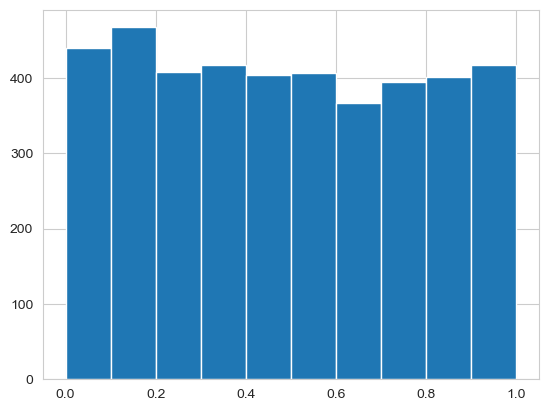

In [69]:
l = 1
length = 4
data = []
for i in range(1000):
	X = st.expon.rvs(scale=1/l,size=1000)
	for j in range(1,1000):
		X[j] += X[j-1]
	starting_point = st.uniform.rvs(loc=0,scale=np.max(X)-length)
	for j in range(1000):
		if X[j] >= starting_point and X[j] <= starting_point+length:
			data.append(X[j]-starting_point)
data = np.array(data)/length
print(st.kstest(data,st.uniform.cdf))
plt.hist(data)

4. На картинке приведено расположений ели на участке хвойного леса. Считая, что они образуют двумерный одномерный пуассоновский поток, оценить число деревьев на небольшом участке и отсюда а)оценить число деревьев на картинке б) построить доверительный интервал (асимптотический) для этого количества. Повторить процедуру повторно и сравнить результаты.

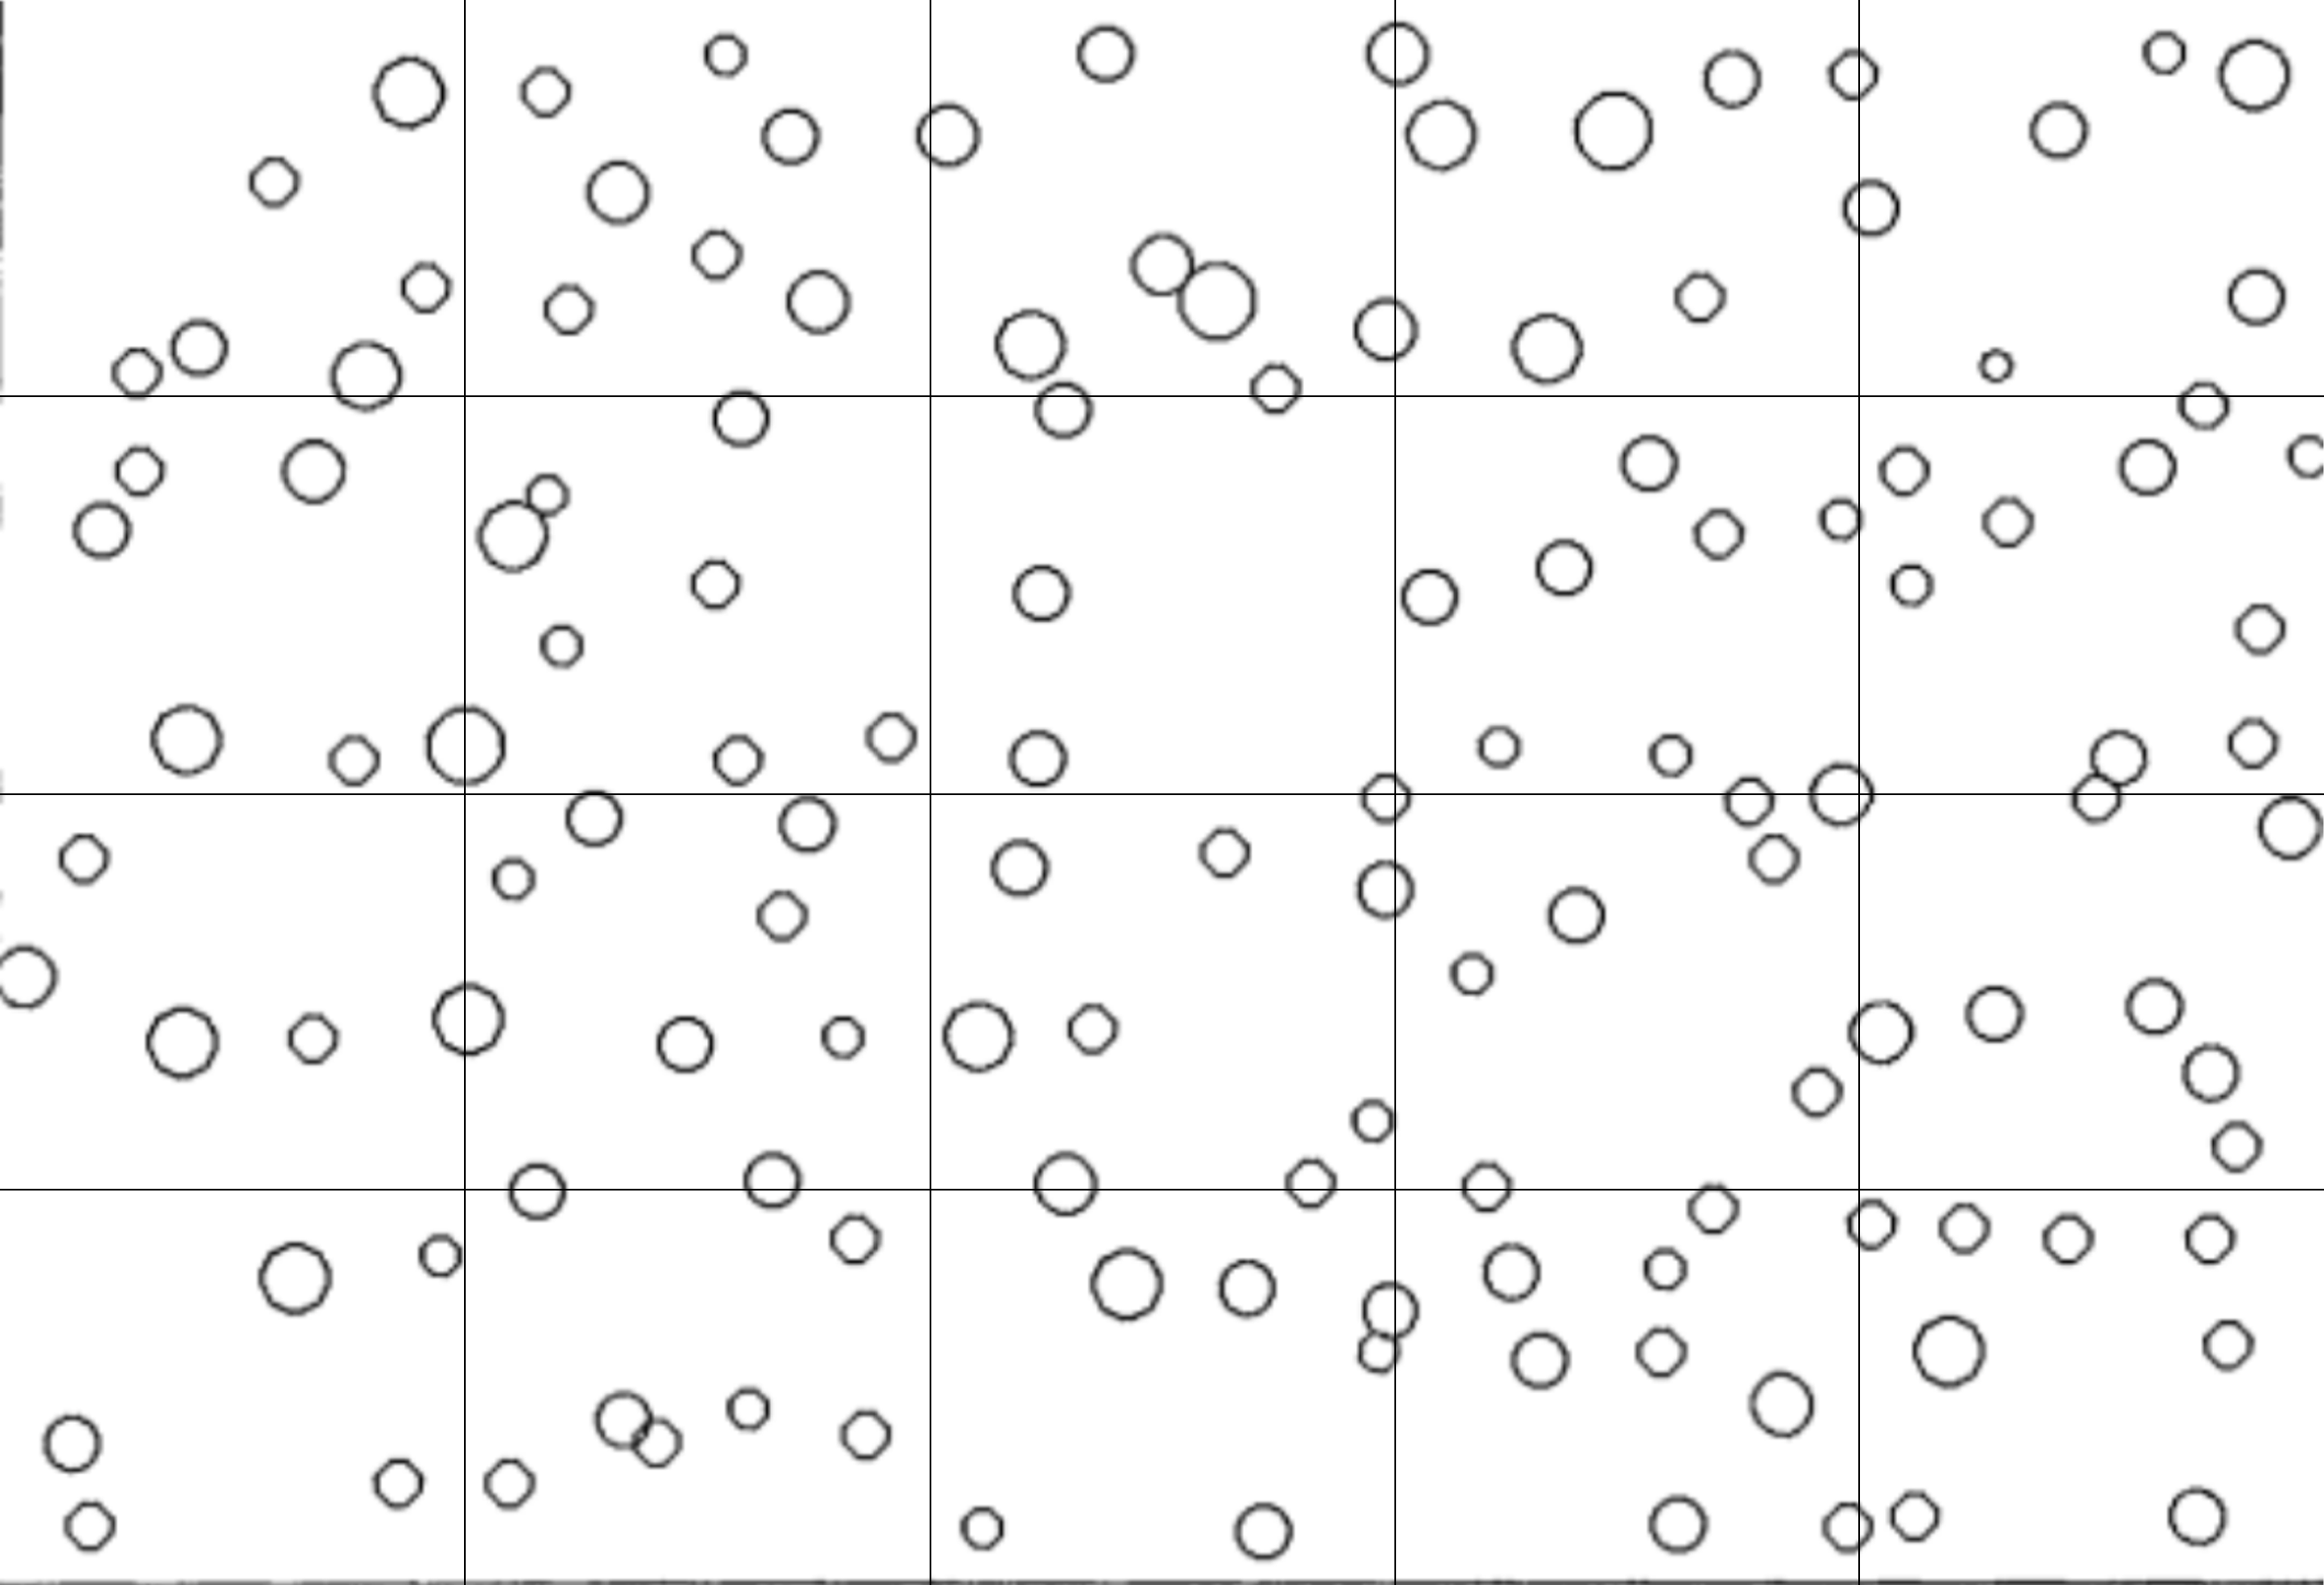

In [70]:
from PIL import Image
from IPython.display import display
image = Image.open('/Users/mihailkondrasin/Desktop/Матпрак/сем 2/9.4,5.png')
display(image)

Рассмотрим квадрат 1,1: в нем 8 деревьев, тогда исходя из того, что у нас 20 квадратов, выходит ~160 деревьев. Предположим, что интенсивность в каждом квадрате 8, тогда (S_n-20*8)/(20^0.5*8^0.5)~N(0,1), S_n \in (160-x*160^0.5,160+x*160^0.5), где x - квантиль стандартного нормального распределения уровня 1-alpha/2.

In [72]:
quantile = st.norm.ppf(0.975)
print('('+str(160-quantile*4*10**0.5)+'; '+str(160+quantile*4*10**0.5)+')')

(135.20819870781753; 184.79180129218247)


Повторяем процедуру, выпал (1,3), в квадрате 7 деревьев.

In [74]:
quantile = st.norm.ppf(0.975)
print('('+str(140-quantile*(140)**0.5)+'; '+str(140+quantile*(140)**0.5)+')')

(116.80939339091843; 163.19060660908156)


5. Проверить однородность потока на основе сравнения нескольких участков леса.

In [75]:
forest=np.matrix([[6,7,7,7,6],
				[5,8,3,7,9],
				[4,8,9,7,7],
				[5,7,6,8,8]])
observed_by_rows=[]
for i in range(4):
	observed_by_rows.append(np.sum(forest[i]))
expected_by_rows=np.ones(4)*np.sum(observed_by_rows)/4
st.chisquare(observed_by_rows,expected_by_rows)

Power_divergenceResult(statistic=0.14925373134328357, pvalue=0.9853329191003728)

In [76]:
observed_by_columns=[]
for i in range(5):
	observed_by_columns.append(np.sum(forest.T[i]))
expected_by_columns=np.ones(5)*np.sum(observed_by_columns)/5
st.chisquare(observed_by_columns,expected_by_columns)

Power_divergenceResult(statistic=2.7910447761194033, pvalue=0.5933795317586907)

Можно принять гипотезу об однородности потока.